## Parse Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def list_to_plate(lst: pd.Series) -> pd.DataFrame:
    new_index = pd.MultiIndex.from_tuples([(i[0], int(i[1:])) for i in lst.index])
    plate =  pd.Series(lst.values, index=new_index).unstack()
    return plate

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'][:len(df.index)]
    return df

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pathlib import Path
DRIVE_FOLDER = Path('/content/drive/Shared drives/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240919_pVan_validation')

!ls "{DRIVE_FOLDER}"

cts1 = pd.read_csv(DRIVE_FOLDER / '20240919_pVan_validation_1.txt', sep='\t', header=1)[['Pos', 'Cp']]
cts1 = list_to_plate(cts1.set_index('Pos').Cp)
cts2 = pd.read_csv(DRIVE_FOLDER / '20240919_pVan_validation_2.txt', sep='\t', header=1)[['Pos', 'Cp']]
cts2 = list_to_plate(cts2.set_index('Pos').Cp)
cts3 = pd.read_csv(DRIVE_FOLDER / '240920_ON_propagation.txt', sep='\t', header=1)[['Pos', 'Cp']]
cts3 = list_to_plate(cts3.set_index('Pos').Cp)
cts3 = set_plate_axes(cts3.iloc[::-1, ::-1])

layout_plate1 = pd.read_excel(DRIVE_FOLDER / 'layout_plate_1.xlsx', header=None)
layout_plate2 = pd.read_excel(DRIVE_FOLDER / 'layout_plate_2.xlsx', header=None)




Mounted at /content/drive
20240919_analysis.ipynb		20240919_pVan_validation_2.txt	layout_plate_1.xlsx
20240919_pVan_validation_1.txt	240920_ON_propagation.txt	layout_plate_2.xlsx


In [3]:
cts3

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,25.26,25.61,24.38,25.95,25.57,25.27,25.62,25.31,25.75,25.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,26.60,26.92,27.19,26.95,30.52,27.87,27.67,27.76,NaN,27.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,24.46,24.80,23.12,25.75,25.04,25.30,25.79,25.71,25.35,25.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,26.60,27.09,27.44,27.24,30.77,28.17,27.73,27.98,29.15,28.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,24.28,23.88,23.17,25.42,24.51,24.24,25.67,25.12,25.45,25.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,26.18,26.92,26.93,27.32,30.42,27.13,30.65,27.95,29.50,28.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,31.59,31.20,31.11,NaN,NaN,NaN,NaN,NaN,NaN,28.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cts3

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,25.26,25.61,24.38,25.95,25.57,25.27,25.62,25.31,25.75,25.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,26.60,26.92,27.19,26.95,30.52,27.87,27.67,27.76,NaN,27.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,24.46,24.80,23.12,25.75,25.04,25.30,25.79,25.71,25.35,25.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,26.60,27.09,27.44,27.24,30.77,28.17,27.73,27.98,29.15,28.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,24.28,23.88,23.17,25.42,24.51,24.24,25.67,25.12,25.45,25.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,26.18,26.92,26.93,27.32,30.42,27.13,30.65,27.95,29.50,28.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,31.59,31.20,31.11,NaN,NaN,NaN,NaN,NaN,NaN,28.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cts_plate1 = plate_to_list(set_plate_axes(cts1.iloc[:8, ::2])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate1['plate'] = 'plate1'
cts_plate1['tp_min'] = 30
cts_plate2 = plate_to_list(set_plate_axes(cts1.iloc[8:, ::2])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate2['plate'] = 'plate1'
cts_plate2['tp_min'] = 60
cts_plate3 = plate_to_list(set_plate_axes(cts1.iloc[:8, 1::2])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate3['plate'] = 'plate2'
cts_plate3['tp_min'] = 30
cts_plate4 = plate_to_list(set_plate_axes(cts1.iloc[8:, 1::2])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate4['plate'] = 'plate2'
cts_plate4['tp_min'] = 60

cts_plate5 = plate_to_list(set_plate_axes(cts2.iloc[:8, ::2])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate5['plate'] = 'plate1'
cts_plate5['tp_min'] = 120
cts_plate6 = plate_to_list(set_plate_axes(cts2.iloc[8:, ::2])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate6['plate'] = 'plate1'
cts_plate6['tp_min'] = 240
cts_plate7 = plate_to_list(set_plate_axes(cts2.iloc[:8, 1::2])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate7['plate'] = 'plate2'
cts_plate7['tp_min'] = 120
cts_plate8 = plate_to_list(set_plate_axes(cts2.iloc[8:, 1::2])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate8['plate'] = 'plate2'
cts_plate8['tp_min'] = 240

# ON plate was multiplexed row-wise
cts_plate9 = plate_to_list(set_plate_axes(cts3.iloc[::2, :12])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate9['plate'] = 'plate1'
cts_plate9['tp_min'] = 600
cts_plate10 = plate_to_list(set_plate_axes(cts3.iloc[1::2, :12])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate10['plate'] = 'plate2'
cts_plate10['tp_min'] = 600


cts_all = pd.concat([cts_plate1, cts_plate2, cts_plate3, cts_plate4, cts_plate5, cts_plate6, cts_plate7, cts_plate8, cts_plate9, cts_plate10])
cts_all

,well,cp,plate,tp_min
0,A1,23.48,plate1,30
1,A2,23.78,plate1,30
2,A3,23.57,plate1,30
3,A4,23.85,plate1,30
4,A5,23.68,plate1,30
...,...,...,...,...
61,G11,25.59,plate2,600
62,G12,26.52,plate2,600
63,H5,31.40,plate2,600
64,H8,6.69,plate2,600


In [6]:
list_to_plate(cts_plate9.set_index('well').cp)

,1,2,3,4,5,6,7,8,9,10,11,12
A,25.26,25.61,24.38,25.95,25.57,25.27,25.62,25.31,25.75,25.95,25.20,25.00
B,24.46,24.80,23.12,25.75,25.04,25.30,25.79,25.71,25.35,25.13,25.51,25.82
C,24.28,23.88,23.17,25.42,24.51,24.24,25.67,25.12,25.45,25.18,25.78,26.19
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.25,28.26,24.20
F,31.56,30.76,27.65,29.26,26.27,24.35,24.84,24.88,25.23,26.09,24.97,26.22
G,32.80,31.19,30.73,30.71,28.99,22.21,20.21,20.01,21.56,21.44,20.23,19.50
H,NaN,33.05,NaN,23.26,17.80,NaN,11.13,NaN,16.87,NaN,NaN,NaN


In [7]:
def parse_plate(df, num_cols):
  pass

def parse_layout(layout: pd.DataFrame):
  idx = 0
  plates = []
  while idx < len(layout.index)-9:
    if layout.iloc[idx, 0] is not None:
      plate = set_plate_axes(layout.iloc[idx+2:idx+2+8, 1:1+12])
      print(plate)
      plate = plate_to_list(plate)
      plate.name = layout.iloc[idx,  0]
      plates.append(plate)
      idx += 11
    else:
      idx += 1
  return pd.concat(plates, axis=1)

meta_plate1 = parse_layout(layout_plate1).reset_index().rename(columns={'index': 'well'})
meta_plate1['plate'] = 'plate1'

meta_plate2 = parse_layout(layout_plate2).reset_index().rename(columns={'index': 'well'})
meta_plate2['plate'] = 'plate2'

meta = pd.concat([meta_plate1, meta_plate2]) # this only works becase meta columns are the same, which won't be the case all the time
meta

            1            2            3            4            5   \
A  2049-08-DP6  2049-08-DP6  2049-08-DP6  2049-08-DP6  2049-08-DP6   
B  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6   
C  2055-08-DP6  2055-08-DP6  2055-08-DP6  2055-08-DP6  2055-08-DP6   
D          NaN          NaN          NaN          NaN          NaN   
E          NaN          NaN          NaN          NaN          NaN   
F    S2060-DP6    S2060-DP6    S2060-DP6  2049-08-DP6  2049-08-DP6   
G    S2060-DP6    S2060-DP6    S2060-DP6    S2060-DP6    S2060-DP6   
H        S2208        S2208        S2208        S2208        S2208   

            6            7            8            9            10  \
A  2049-08-DP6  2049-08-DP6  2049-08-DP6  2049-08-DP6  2049-08-DP6   
B  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6   
C  2055-08-DP6  2055-08-DP6  2055-08-DP6  2055-08-DP6  2055-08-DP6   
D          NaN          NaN          NaN          NaN          NaN   
E          NaN     

,well,strain,Phage,van_acid_um,Tetracyclin,plate
0,A1,2049-08-DP6,SIAH1,0,uninduced,plate1
1,A2,2049-08-DP6,SIAH1,0,uninduced,plate1
2,A3,2049-08-DP6,SIAH1,0,uninduced,plate1
3,A4,2049-08-DP6,SIAH1,10,uninduced,plate1
4,A5,2049-08-DP6,SIAH1,10,uninduced,plate1
...,...,...,...,...,...,...
65,H10,S2208,TadA,500,uninduced,plate2
66,H11,S2208,TadA,500,uninduced,plate2
67,H12,S2208,TadA,500,uninduced,plate2
68,F6,NaN,NaN,0,NaN,plate2


In [8]:
df = pd.merge(cts_all, meta, on=['well', 'plate'])
df

,well,cp,plate,tp_min,strain,Phage,van_acid_um,Tetracyclin
0,A1,23.48,plate1,30,2049-08-DP6,SIAH1,0,uninduced
1,A1,23.90,plate1,60,2049-08-DP6,SIAH1,0,uninduced
2,A1,22.95,plate1,120,2049-08-DP6,SIAH1,0,uninduced
3,A1,23.44,plate1,240,2049-08-DP6,SIAH1,0,uninduced
4,A1,25.26,plate1,600,2049-08-DP6,SIAH1,0,uninduced
...,...,...,...,...,...,...,...,...
701,H11,11.77,plate2,240,S2208,TadA,500,uninduced
702,H12,24.88,plate2,30,S2208,TadA,500,uninduced
703,H12,24.16,plate2,60,S2208,TadA,500,uninduced
704,H12,18.58,plate2,120,S2208,TadA,500,uninduced


In [9]:
df.strain.unique()

array(['2049-08-DP6', '2054-08-DP6', '2055-08-DP6', 'LB', 'S2060-DP6',
       'S2208', nan], dtype=object)

## Time Series

Text(0.5, 1.0, 'LB')

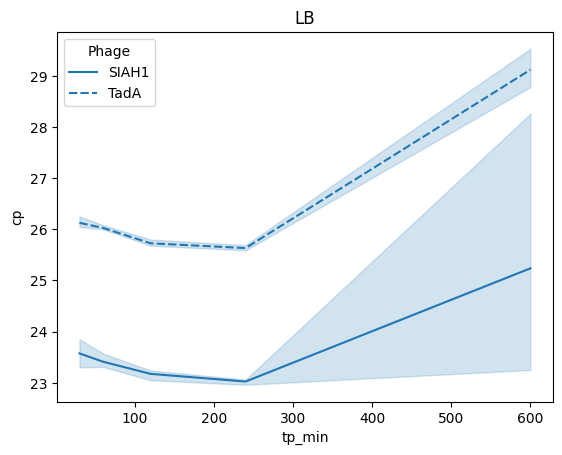

In [10]:
ax = sns.lineplot(df[(df.strain == 'LB')], x='tp_min', y='cp', style='Phage')
ax.set_title('LB')

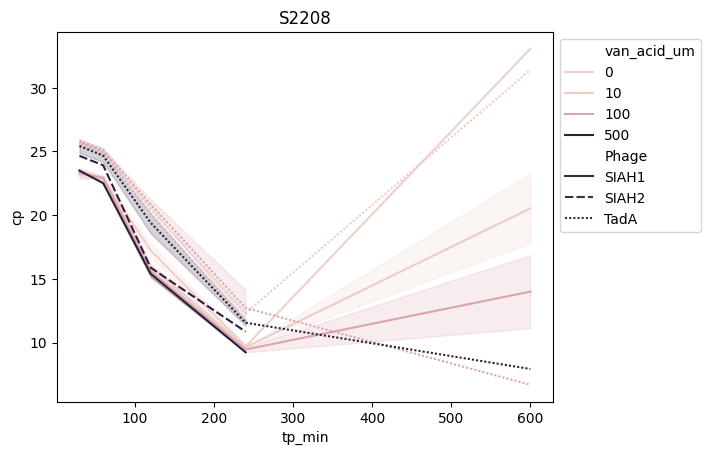

In [11]:
ax = sns.lineplot(df[(df.strain == 'S2208')], x='tp_min', y='cp', hue='van_acid_um', style='Phage')
ax.set_title('S2208')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

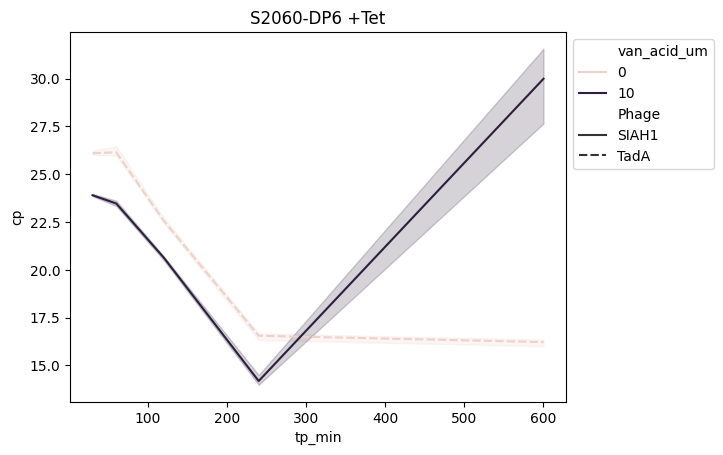

In [12]:
ax = sns.lineplot(df[(df.strain == 'S2060-DP6') & (df.Tetracyclin == 'induced')], x='tp_min', y='cp', hue='van_acid_um', style='Phage')
ax.set_title('S2060-DP6 +Tet')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

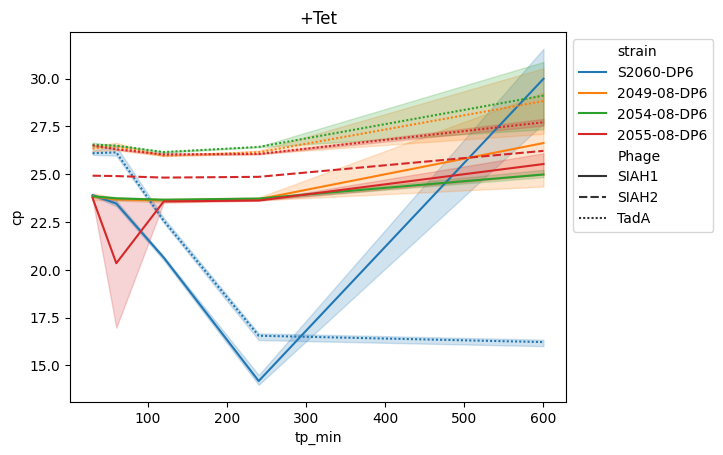

In [13]:
ax = sns.lineplot(df[(df.Tetracyclin == 'induced')], x='tp_min', y='cp', hue='strain', style='Phage')
ax.set_title('+Tet')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

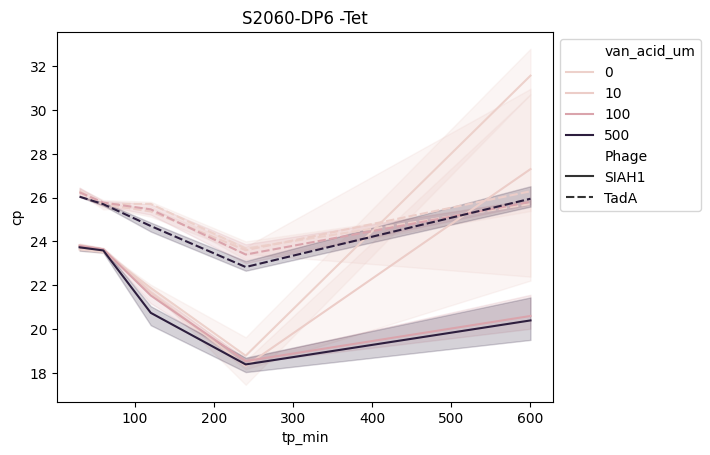

In [14]:
ax = sns.lineplot(df[(df.strain == 'S2060-DP6') & (df.Tetracyclin == 'uninduced')], x='tp_min', y='cp', hue='van_acid_um', style='Phage')
ax.set_title('S2060-DP6 -Tet')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

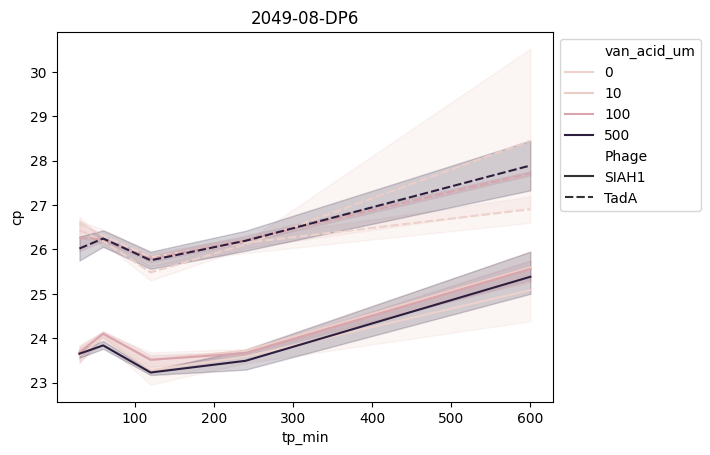

In [15]:
ax = sns.lineplot(df[(df.strain == '2049-08-DP6') & (df.Tetracyclin == 'uninduced')], x='tp_min', y='cp', hue='van_acid_um', style='Phage')
ax.set_title('2049-08-DP6')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


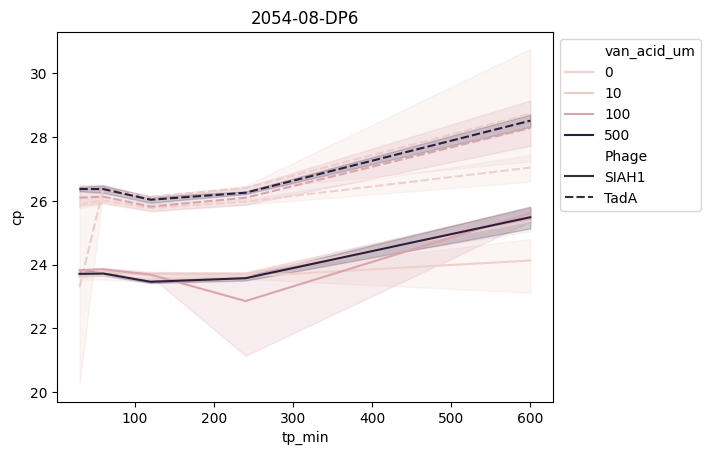

In [16]:
ax = sns.lineplot(df[(df.strain == '2054-08-DP6') & (df.Tetracyclin == 'uninduced')], x='tp_min', y='cp', hue='van_acid_um', style='Phage')
ax.set_title('2054-08-DP6')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

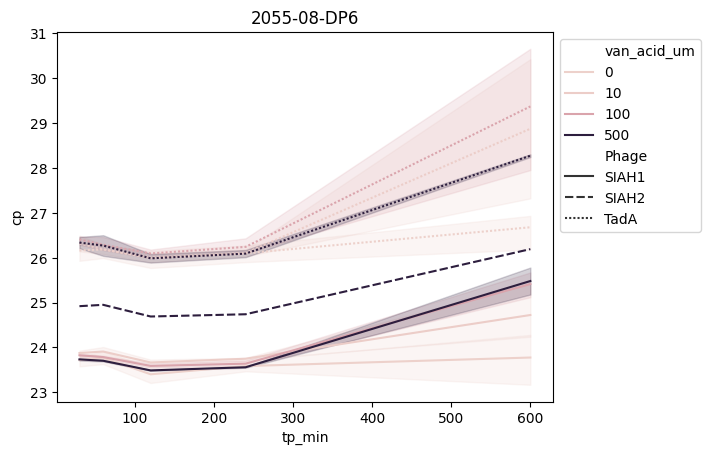

In [17]:
ax = sns.lineplot(df[(df.strain == '2055-08-DP6') & (df.Tetracyclin == 'uninduced')], x='tp_min', y='cp', hue='van_acid_um', style='Phage')
ax.set_title('2055-08-DP6')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Fold change

In [18]:
d_240 = df[(df.tp_min == 240) & (df.Phage != 'SIAH2')]

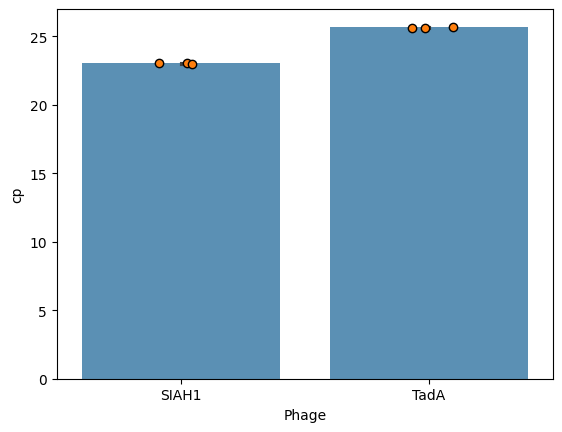

In [19]:
_ = bars(d_240[d_240.strain == 'LB'], x='Phage', y='cp')

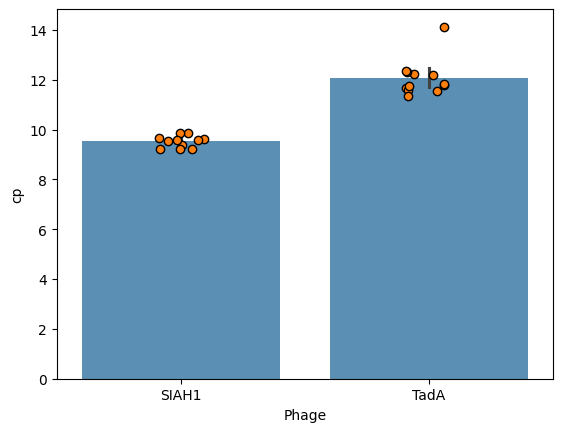

In [20]:
_ = bars(d_240[d_240.strain == 'S2208'], x='Phage', y='cp')

In [21]:
d_240['cp_init'] = pd.NA
for phage in d_240.Phage.unique():
  d_240.loc[d_240.Phage == phage, 'cp_init'] = d_240[(d_240.Phage == phage) & (d_240.strain == 'LB')].cp.mean()

d_240['fc_log2'] = d_240.cp_init - d_240.cp
d_240['fc'] = 2 ** d_240.fc_log2
d_240

<ipython-input-21-cf7697b00353>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_240['cp_init'] = pd.NA
<ipython-input-21-cf7697b00353>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_240['fc_log2'] = d_240.cp_init - d_240.cp
<ipython-input-21-cf7697b00353>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,well,cp,plate,tp_min,strain,Phage,van_acid_um,Tetracyclin,cp_init,fc_log2,fc
3,A1,23.44,plate1,240,2049-08-DP6,SIAH1,0,uninduced,23.023333,-0.416667,0.749154
8,A2,23.62,plate1,240,2049-08-DP6,SIAH1,0,uninduced,23.023333,-0.596667,0.66128
13,A3,23.69,plate1,240,2049-08-DP6,SIAH1,0,uninduced,23.023333,-0.666667,0.629961
18,A4,23.76,plate1,240,2049-08-DP6,SIAH1,10,uninduced,23.023333,-0.736667,0.600124
23,A5,23.68,plate1,240,2049-08-DP6,SIAH1,10,uninduced,23.023333,-0.656667,0.634342
...,...,...,...,...,...,...,...,...,...,...,...
687,H8,12.19,plate2,240,S2208,TadA,100,uninduced,25.633333,13.443333,11139.009518
692,H9,11.85,plate2,240,S2208,TadA,100,uninduced,25.633333,13.783333,14099.274748
696,H10,11.58,plate2,240,S2208,TadA,500,uninduced,25.633333,14.053333,17001.015856
701,H11,11.77,plate2,240,S2208,TadA,500,uninduced,25.633333,13.863333,14903.187767


Text(0.5, 1.0, '2024.09.19 +Tet -van T=4h')

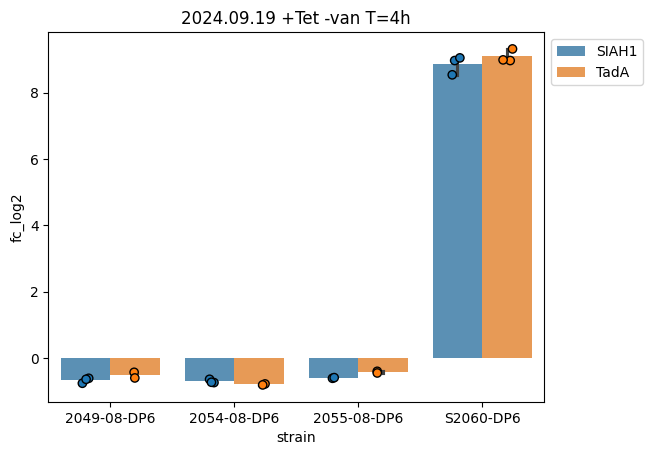

In [37]:
ax = bars(d_240[(d_240.Tetracyclin == 'induced') & (d_240.tp_min == 240)].sort_values('strain'), x='strain', y='fc_log2', hue='Phage')
ax.set_title('2024.09.19 +Tet -van T=4h')

Text(0.5, 1.0, '2024.09.19 -Tet -van T=4h')

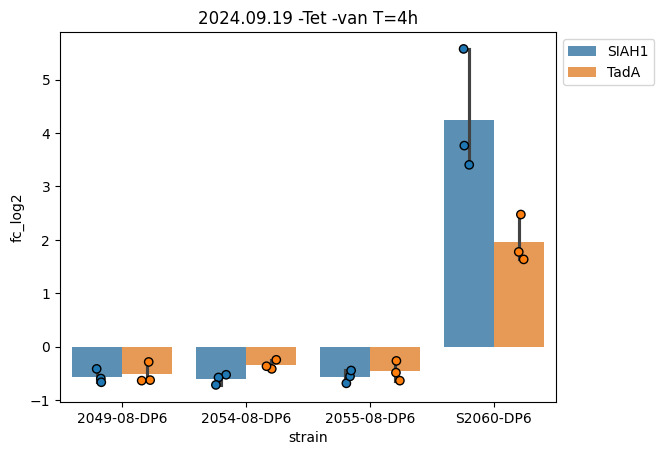

In [39]:
ax = bars(d_240[(d_240.Tetracyclin == 'uninduced') & (d_240.tp_min == 240) & (~d_240.strain.isin({'S2208', 'LB'})) & (d_240.van_acid_um == 0)].sort_values('strain'), x='strain', y='fc_log2', hue='Phage')
ax.set_title('2024.09.19 -Tet -van T=4h')

In [ ]:
ax = bars(d_240[(d_240.Tetracyclin == 'uninduced') & (d_240.tp_min == 240) & (~d_240.strain.isin({'S2208', 'LB'})) & (d_240.Phage == 'SIAH1')].sort_values('strain'), x='van_acid_um', y='fc_log2', hue='Phage')
ax.set_title('2024.09.19 -Tet -van T=4h')